## Planar angles and strand length

In [1]:
from config import *
ways = [load_agg_df(way=x) for x in range(3, 9)]

In [2]:
def summary_plot(way, ax, idx=1, prec=10):
    
    way['frac'] = (way[f"strand_{idx}_nts"] * prec //
                   way.loop_length * (100//prec))
    
    sns.stripplot(
        data=way,
        y='frac',
        x=f"planar_{idx}_median",
        size=3,
        jitter=0.2,
        alpha=0.7,
        ax=ax,
        color="k",
        orient="horizontal",
    )
    sns.boxplot(
        data=way,
        y='frac',
        x=way[f"planar_{idx}_median"],
        ax=ax,
        orient="horizontal",
        linewidth=2
    )
    ax.set_ylabel(f'strand {idx} bases / total loop bases / %')

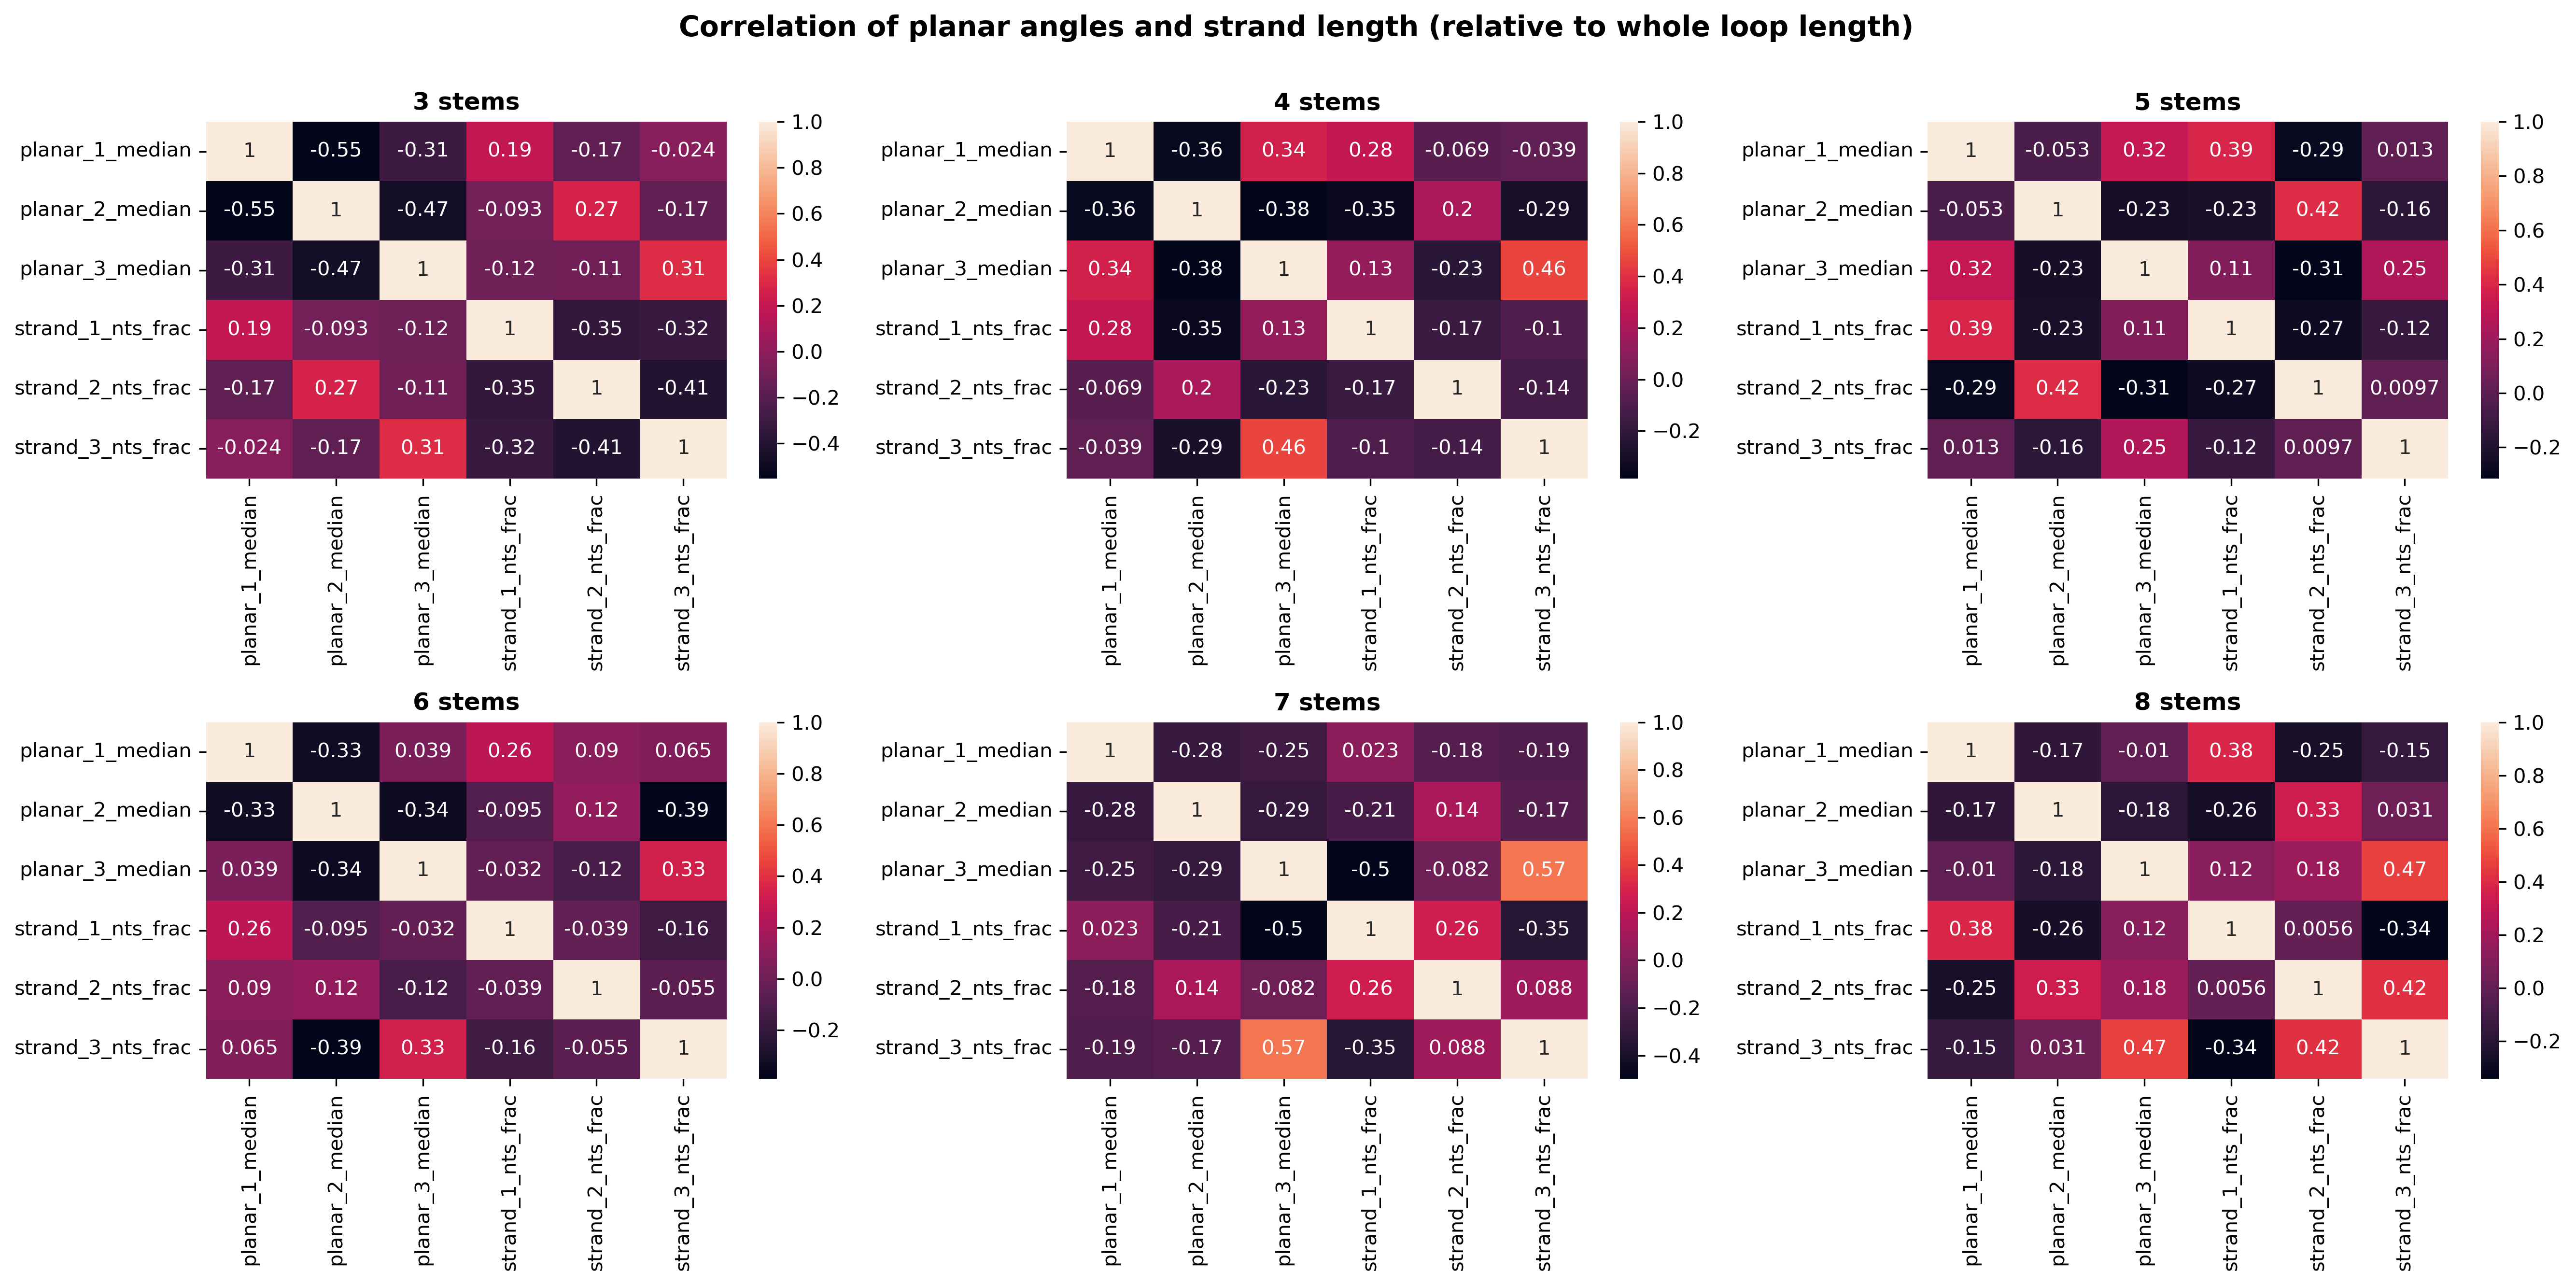

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9), dpi=300)
ax = ax.ravel()
for idx, way in enumerate(ways):
    nts_cols = [f'strand_{i}_nts' for i in range(1, 4)]
    df = way[[f'planar_{i}_median' for i in range(1, 4)]]
    for i, col in enumerate(nts_cols):
        df[f'strand_{i+1}_nts_frac'] = way[col] / way.loop_length
    sns.heatmap(df.corr(method='pearson'), ax=ax[idx], annot=True)
    ax[idx].set_title(f'{idx+3} stems', weight='bold')
fig.suptitle('Correlation of planar angles and strand length' +
             ' (relative to whole loop length)\n', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('correlations.png')

In [ ]:
fig, ax = plt.subplots(6, 3, figsize=(12, 28), dpi=150)
for j, way in enumerate(ways):
    for i in range(1, 4):
        summary_plot(way, ax[j, i-1], idx=i, prec=20)
    ax[j, 1].set_title(f'{j+3} stems', weight='bold')
    
fig.suptitle('Planar angles depending on strand length' +
             ' (relative to whole loop length, rounded down on 5%)\n\n\n', 
             fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig('angle_vs_length.png')